# Pharma Top And Flops

In [23]:
import pandas as pd
import mysql.connector
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Connect

In [2]:
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="",
    database = "pharmagelder"
)

## Load Data

In [3]:
df_list_raw = pd.read_sql("""SELECT 
    sum(tra_value) as sum_value,
    trc_name as category,
    pha_name as pharma,
    tra_year as year,
    rec_type as type
  FROM transaction
  LEFT JOIN pharma ON tra_fk_pharma = pha_id
  LEFT JOIN transaction_category on tra_fk_transaction_category = trc_id
  LEFT JOIN recipient ON rec_id = tra_fk_recipient
  GROUP BY tra_fk_pharma, tra_year, tra_fk_transaction_category, rec_type""", con=db_connection)

df_accu_raw = pd.read_sql("""SELECT 
    sum(acc_value) as sum_value,
    trc_name as category,
    pha_name as pharma,
    acc_year as year,
    acc_type as type
  FROM accumulation
  LEFT JOIN pharma ON acc_fk_pharma = pha_id
  LEFT JOIN transaction_category on acc_fk_transaction_category = trc_id
  GROUP BY acc_fk_pharma, acc_year, acc_fk_transaction_category, acc_type""", con=db_connection)


## Export

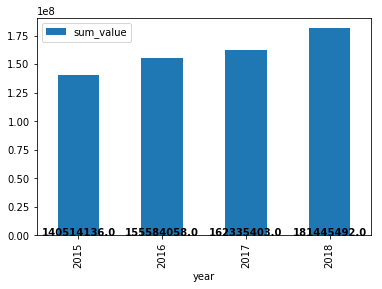

In [93]:
df_list = df_list_raw.copy()
df_accu = df_accu_raw.copy()

#Concat
df_data = pd.concat([df_list, df_accu], sort=False)

df_sum = df_data.groupby('year').sum()

ax = df_sum.plot.bar()
for i, enum in enumerate(df_sum.iterrows()):
    ax.text(x = i, y = 0, s=str(round(enum[1]['sum_value'], 0)), color='black', fontweight='bold',
            horizontalalignment='center',
           )

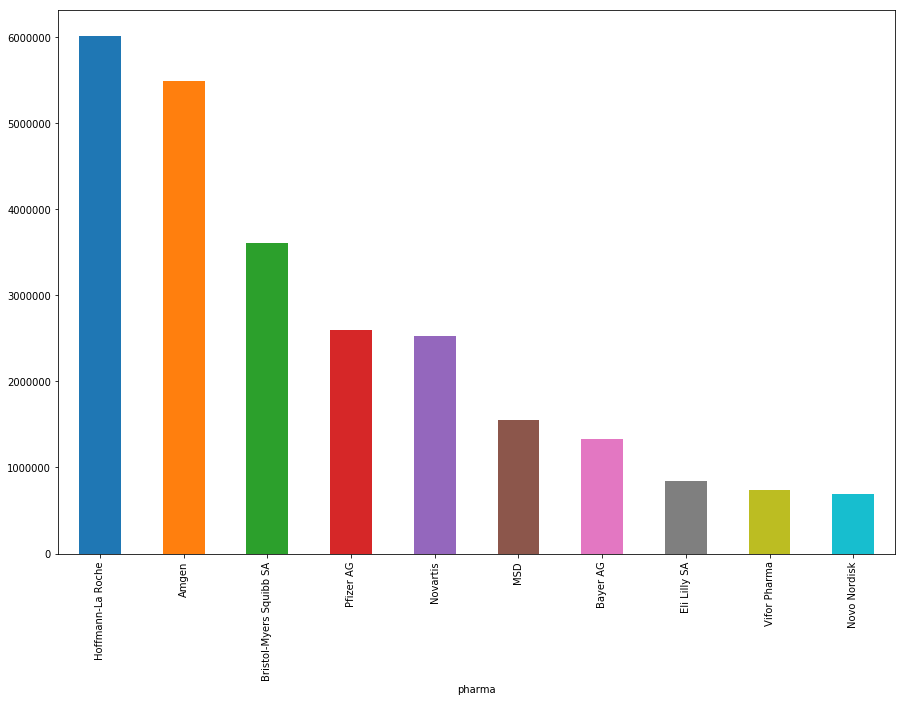

In [38]:
df_grouped = df_data.groupby(['pharma', 'year']).sum().reset_index()

df_pivot = pd.pivot_table(df_grouped, index='pharma', columns='year', values='sum_value')

df_pivot['percentage'] = 100 / df_pivot[2017] * df_pivot[2018]
df_pivot['absolut'] = df_pivot[2018] - df_pivot[2017]

df_pivot = df_pivot.sort_values('absolut', ascending=False)


ax = df_pivot['absolut'].head(10).plot.bar(figsize=(15,10))


In [39]:
x = [2,3,4,5]
enumerate(x)